## Import Package
This notebook is modified from https://colab.research.google.com/drive/14YB2h3vxvxOanJc1yDDEqw0O4atiz7Rm

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
# Make sure the experiment is reproducible
def seed_everything(seed: int):
    import random, os
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
seed_everything(0) # Use 0

In [3]:
def im_convert(tensor):
  image = tensor.to("cpu").clone().detach()
  image = image.numpy().squeeze()
  return image

## Model Defination

Baseline Model

In [4]:
class Net(nn.Module):
  def __init__(self):
      super(Net,self).__init__()
      self.conv1 = nn.Conv2d(1,8,kernel_size=3,stride=1)
      self.conv2 = nn.Conv2d(8,8,kernel_size=3,stride=1)
      self.conv3 = nn.Conv2d(8,8,kernel_size=3,stride=1)
      self.bn1 = nn.BatchNorm2d(8)
      self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #2x2 maxpool
      self.fc1 = nn.Linear(5*5*8,100)
      self.fc2 = nn.Linear(100,10)
    
  def forward(self,x):
    x = F.relu(self.bn1(self.conv1(x))) #26x26x8
    x = F.relu(self.bn1(self.conv2(x))) #24x24x8
    x = self.pool(x) #12x12x8
    x = F.relu(self.bn1(self.conv3(x))) #10x10x8
    x = self.pool(x) #5x5x8
    x = x.view(-1, 5*5*8) #flattening
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

Channel = 16

In [5]:
# class Net(nn.Module):
#   def __init__(self):
#       super(Net,self).__init__()
#       self.conv1 = nn.Conv2d(1,16,kernel_size=3,stride=1)
#       self.conv2 = nn.Conv2d(16,16,kernel_size=3,stride=1)
#       self.conv3 = nn.Conv2d(16,16,kernel_size=3,stride=1)
#       self.bn1 = nn.BatchNorm2d(16)
#       self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #2x2 maxpool
#       self.fc1 = nn.Linear(5*5*16,100)
#       self.fc2 = nn.Linear(100,10)
    
#   def forward(self,x):
#     x = F.relu(self.bn1(self.conv1(x))) #26x26x16
#     x = F.relu(self.bn1(self.conv2(x))) #24x24x16
#     x = self.pool(x) #12x12x16
#     x = F.relu(self.bn1(self.conv3(x))) #10x10x16
#     x = self.pool(x) #5x5x16
#     x = x.view(-1, 5*5*16) #flattening
#     x = F.relu(self.fc1(x))
#     x = self.fc2(x)
#     return x

Channel = 32

In [6]:
# class Net(nn.Module):
#   def __init__(self):
#       super(Net,self).__init__()
#       self.conv1 = nn.Conv2d(1,32,kernel_size=3,stride=1)
#       self.conv2 = nn.Conv2d(32,32,kernel_size=3,stride=1)
#       self.conv3 = nn.Conv2d(32,32,kernel_size=3,stride=1)
#       self.bn1 = nn.BatchNorm2d(32)
#       self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #2x2 maxpool
#       self.fc1 = nn.Linear(5*5*32,100)
#       self.fc2 = nn.Linear(100,10)
    
#   def forward(self,x):
#     x = F.relu(self.bn1(self.conv1(x))) #26x26x32
#     x = F.relu(self.bn1(self.conv2(x))) #24x24x32
#     x = self.pool(x) #12x12x32
#     x = F.relu(self.bn1(self.conv3(x))) #10x10x32
#     x = self.pool(x) #5x5x32
#     x = x.view(-1, 5*5*32) #flattening
#     x = F.relu(self.fc1(x))
#     x = self.fc2(x)
#     return x

Channel = 64

In [3]:
# class Net(nn.Module):
#   def __init__(self):
#       super(Net,self).__init__()
#       self.conv1 = nn.Conv2d(1,64,kernel_size=3,stride=1)
#       self.conv2 = nn.Conv2d(64,64,kernel_size=3,stride=1)
#       self.conv3 = nn.Conv2d(64,64,kernel_size=3,stride=1)
#       self.bn1 = nn.BatchNorm2d(64)
#       self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #2x2 maxpool
#       self.fc1 = nn.Linear(5*5*64,100)
#       self.fc2 = nn.Linear(100,10)
    
#   def forward(self,x):
#     x = F.relu(self.bn1(self.conv1(x))) #26x26x64
#     x = F.relu(self.bn1(self.conv2(x))) #24x24x64
#     x = self.pool(x) #12x12x64
#     x = F.relu(self.bn1(self.conv3(x))) #10x10x64
#     x = self.pool(x) #5x5x64
#     x = x.view(-1, 5*5*64) #flattening
#     x = F.relu(self.fc1(x))
#     x = self.fc2(x)
#     return x

Kernel = 5, Channel = 8

In [8]:
# class Net(nn.Module):
#   def __init__(self):
#       super(Net,self).__init__()
#       self.conv1 = nn.Conv2d(1,8,kernel_size=5,stride=1)
#       self.conv2 = nn.Conv2d(8,8,kernel_size=5,stride=1)
#       self.conv3 = nn.Conv2d(8,8,kernel_size=5,stride=1)
#       self.bn1 = nn.BatchNorm2d(8)
#       self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #2x2 maxpool
#       self.fc1 = nn.Linear(3*3*8,50)
#       self.fc2 = nn.Linear(50,10)
    
#   def forward(self,x):
#     x = F.relu(self.bn1(self.conv1(x))) #24x24x8
#     x = F.relu(self.bn1(self.conv2(x))) #20x20x8
#     x = self.pool(x) #10x10x8
#     x = F.relu(self.bn1(self.conv3(x))) #6x6x8
#     x = self.pool(x) #3x3x8
#     x = x.view(-1, 3*3*8) #flattening
#     x = F.relu(self.fc1(x))
#     x = self.fc2(x)
#     return x

## Data Loader

In [9]:
batch_size = 64
train_ds = datasets.FashionMNIST('.',train=True,download=True, transform=transforms.Compose([transforms.ToTensor(),
                                                                            #transforms.RandomHorizontalFlip(0.5),
                                                                            #transforms.RandomVerticalFlip(0.5),
                                                                            #transforms.RandomAffine(5, shear=10),
                                                                            transforms.Normalize((0.5,), (0.5,))
                                                                            ]))

validation_split = 0
shuffle_dataset = True
np_random_seed= 0

# Creating data indices for training and validation splits:
dataset_size = len(train_ds)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(np_random_seed)
    np.random.shuffle(indices)
train_indices = indices[split:]
# Creating PT data samplers and loaders:
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)


train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, 
                                           sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('.',train=False,download=True,
      transform=transforms.Compose([transforms.ToTensor(), 
                                    transforms.Normalize((0.5,), (0.5,))
                                    ])),batch_size=batch_size,shuffle=True)


## Optimizer, Loss Function, Train and Test

In [10]:
model = Net()
#optimizer = optim.SGD(model.parameters(),lr=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=7.5e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1) # Multiply learning rate by gamma after step_size
criterion = nn.CrossEntropyLoss()
train_errors = []
train_acc = []
test_errors = []
val_acc = []
test_acc = []
n_train = len(train_loader)*batch_size

epoch = 20

for i in range(epoch):
  total_loss = 0
  total_acc = 0  
  c = 0

  for images,labels in train_loader:
    images = images
    labels = labels
    
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    
    total_loss+=loss.item()
    total_acc+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0    
    c+=1
    
  
  #validation
  
  total_loss_val = 0
  total_loss_test = 0
  total_acc_val = 0
  c = 0
  
  #testing
  total_acc_test = 0
  for images,labels in test_loader:
    images = images
    labels = labels
    output = model(images)
    total_loss_test += loss.item()
    total_acc_test+=torch.sum(torch.max(output,dim=1)[1]==labels).item()*1.0

  train_errors.append(total_loss/n_train)
  train_acc.append(total_acc/n_train)
  test_errors.append(total_loss_test/len(test_loader.dataset))
  test_acc.append(total_acc_test/len(test_loader.dataset))
  print(f"Epoch: {i+1}. Train Accuracy: {train_acc[i]:.3f}. Test accuracy :{(test_acc[i]):.4f}")

print("Trainig complete")

Epoch: 1. Train Accuracy: 0.841. Test accuracy :0.8737
Epoch: 2. Train Accuracy: 0.884. Test accuracy :0.8836
Epoch: 3. Train Accuracy: 0.896. Test accuracy :0.8918
Epoch: 4. Train Accuracy: 0.904. Test accuracy :0.8943
Epoch: 5. Train Accuracy: 0.908. Test accuracy :0.8886
Epoch: 6. Train Accuracy: 0.911. Test accuracy :0.8957
Epoch: 7. Train Accuracy: 0.914. Test accuracy :0.9003
Epoch: 8. Train Accuracy: 0.916. Test accuracy :0.8983
Epoch: 9. Train Accuracy: 0.917. Test accuracy :0.8965
Epoch: 10. Train Accuracy: 0.921. Test accuracy :0.8961
Epoch: 11. Train Accuracy: 0.921. Test accuracy :0.9048
Epoch: 12. Train Accuracy: 0.924. Test accuracy :0.8996
Epoch: 13. Train Accuracy: 0.925. Test accuracy :0.8980
Epoch: 14. Train Accuracy: 0.928. Test accuracy :0.8967
Epoch: 15. Train Accuracy: 0.927. Test accuracy :0.9058
Epoch: 16. Train Accuracy: 0.929. Test accuracy :0.8964
Epoch: 17. Train Accuracy: 0.930. Test accuracy :0.9003
Epoch: 18. Train Accuracy: 0.932. Test accuracy :0.9014
E

## Plot

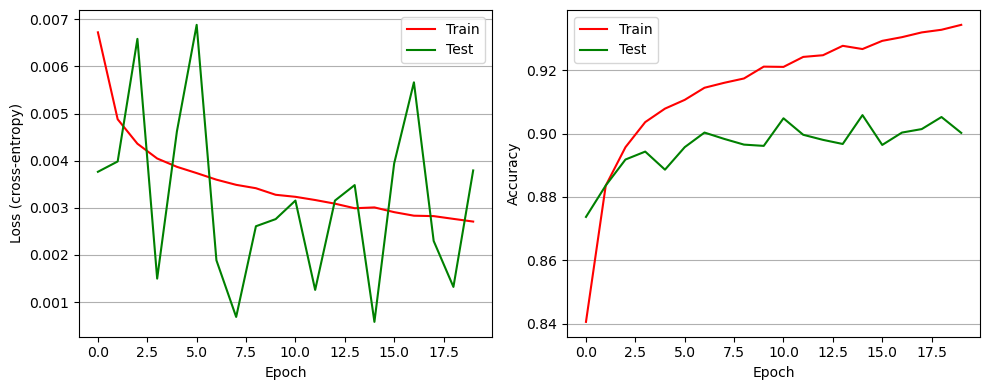

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(train_errors, 'r',label="Train")
ax[0].plot(test_errors, 'g', label="Test")
ax[0].set_ylabel("Loss (cross-entropy)")
ax[0].set_xlabel("Epoch")
ax[0].legend()
ax[0].grid(axis='y')
ax[1].plot(train_acc, 'r',label="Train")
ax[1].plot(test_acc, 'g', label="Test")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()
ax[1].grid(axis='y')
fig.tight_layout()
plt.show()

In [12]:
# Print Trainable Parameter
trainable_params = sum(
	p.numel() for p in model.parameters() if p.requires_grad
)
print(trainable_params)


22374


In [13]:
print(train_acc)
print(test_acc)

[0.8406016791044776, 0.8835621002132196, 0.8956889658848614, 0.9036014125799574, 0.9078491471215352, 0.9106143390191898, 0.9144289712153518, 0.915994802771855, 0.9173607409381663, 0.9210920842217484, 0.9210087953091685, 0.9241571162046909, 0.9246901652452025, 0.9276552505330491, 0.9266391257995735, 0.9292210820895522, 0.9303871268656716, 0.9318863272921108, 0.9327192164179104, 0.9342683901918977]
[0.8737, 0.8836, 0.8918, 0.8943, 0.8886, 0.8957, 0.9003, 0.8983, 0.8965, 0.8961, 0.9048, 0.8996, 0.898, 0.8967, 0.9058, 0.8964, 0.9003, 0.9014, 0.9052, 0.9002]


## Record Result

In [16]:
# Test Learning Rate
test_acc_8_SGD_05 = [0.8367, 0.8323, 0.8646, 0.8908, 0.8798, 0.865, 0.8804, 0.886, 0.8936, 0.8789, 0.8899, 0.8897, 0.8821, 0.8892, 0.8928, 0.8975, 0.8698, 0.8995, 0.8966, 0.856]
test_acc_8_SGD_002 = [0.8279, 0.8456, 0.8744, 0.8799, 0.8833, 0.8912, 0.8874, 0.8941, 0.8954, 0.8742, 0.8911, 0.8947, 0.8996, 0.8982, 0.9017, 0.9027, 0.9024, 0.9039, 0.9065, 0.8884]
test_acc_8_Adam_3e_4 = [0.8438, 0.8596, 0.8661, 0.8764, 0.8794, 0.8854, 0.8872, 0.886, 0.8905, 0.8934, 0.8989, 0.894, 0.8979, 0.8987, 0.9009, 0.9002, 0.9006, 0.8963, 0.9032, 0.903]
test_acc_8_Adam_15e_4 = [0.8671, 0.8847, 0.8938, 0.9018, 0.8966, 0.8988, 0.8983, 0.9045, 0.9057, 0.8975, 0.9096, 0.9079, 0.9088, 0.907, 0.9108, 0.9095, 0.9087, 0.9022, 0.91, 0.904]
test_acc_8_Adam_6e_5 = [0.7611, 0.8019, 0.8273, 0.8413, 0.8445, 0.8504, 0.8572, 0.8614, 0.8601, 0.8654, 0.87, 0.8707, 0.8714, 0.8727, 0.874, 0.8767, 0.8763, 0.8765, 0.8779, 0.881]
test_acc_8_Adam_75e_4 = [0.8737, 0.8836, 0.8918, 0.8943, 0.8886, 0.8957, 0.9003, 0.8983, 0.8965, 0.8961, 0.9048, 0.8996, 0.898, 0.8967, 0.9058, 0.8964, 0.9003, 0.9014, 0.9052, 0.9002]
# 8 channels
train_acc_initial = [0.6258328891257996, 0.8277085554371002, 0.8586087420042644, 0.8723347547974414, 0.8805470415778252, 0.8879764125799574, 0.8915744936034116, 0.8949726812366737, 0.8985707622601279, 0.9025519722814499, 0.9045175906183369, 0.9060834221748401, 0.9098147654584222, 0.9112306769722814, 0.9124633528784648, 0.9149786780383795, 0.9161447228144989, 0.917993736673774, 0.9188932569296375, 0.921924973347548]
test_acc_initial = [0.7937, 0.785, 0.8507, 0.8717, 0.8731, 0.8775, 0.8724, 0.8839, 0.8885, 0.8725, 0.8864, 0.8845, 0.8791, 0.8941, 0.8978, 0.8975, 0.8899, 0.8973, 0.8995, 0.8669]
train_acc_transform_batch = [0.7290778251599147, 0.8438999200426439, 0.869253065031983, 0.8813466151385928, 0.8874600213219617, 0.8943396855010661, 0.8993869936034116, 0.90238539445629, 0.9060834221748401, 0.9079990671641791, 0.9105643656716418, 0.9129797441364605, 0.9157116204690832, 0.9185101279317697, 0.9193097014925373, 0.921924973347548, 0.9221914978678039, 0.9239239072494669, 0.9249733475479744, 0.9267890458422174]
test_acc_transform_batch = [0.8098, 0.8192, 0.8632, 0.8796, 0.8815, 0.879, 0.8729, 0.891, 0.8922, 0.887, 0.8848, 0.8939, 0.887, 0.8872, 0.8968, 0.9041, 0.9024, 0.8975, 0.902, 0.8699]
train_acc_transform_batch_batchnorm2d = [0.8209788113006397, 0.8773487473347548, 0.8914912046908315, 0.8999866737739872, 0.9070662313432836, 0.9114638859275054, 0.9145788912579957, 0.9183268923240938, 0.9203757995735607, 0.9243403518123667, 0.925789578891258, 0.9286547174840085, 0.9305370469083155, 0.9312033582089553, 0.9332022921108742, 0.9358508795309168, 0.9362673240938166, 0.9383495469083155, 0.9407649253731343, 0.941481210021322]
test_acc_transform_batch_batchnorm2d = [0.8585, 0.8635, 0.8802, 0.8995, 0.8967, 0.901, 0.9035, 0.909, 0.9076, 0.8977, 0.9044, 0.9013, 0.9062, 0.9018, 0.9042, 0.9057, 0.8969, 0.8994, 0.9036, 0.89]
train_acc_horizontal = [0.8059368336886994, 0.8703524786780383, 0.8832289445628998, 0.8931902985074627, 0.898387526652452, 0.9035347814498934, 0.9072161513859275, 0.9081156716417911, 0.9122634594882729, 0.9129297707889126, 0.9161780383795309, 0.9173440831556503, 0.919909381663113, 0.9215085287846482, 0.9219083155650319, 0.9243736673773987, 0.9234741471215352, 0.9256396588486141, 0.9271721748400853, 0.927788512793177]
test_acc_horizontal = [0.8304, 0.8788, 0.8847, 0.882, 0.8808, 0.8933, 0.8975, 0.8892, 0.8931, 0.9021, 0.8984, 0.8964, 0.8991, 0.8985, 0.9076, 0.9026, 0.9079, 0.9055, 0.9074, 0.9021]
train_acc_affine = [0.7994736140724946, 0.8591084754797441, 0.8759994669509595, 0.8838952558635395, 0.888842617270789, 0.8949726812366737, 0.8971215351812367, 0.8986873667377399, 0.9010027985074627, 0.9038346215351812, 0.9048007729211087, 0.9065664978678039, 0.908032382729211, 0.9080656982942431, 0.9116138059701493, 0.9120802238805971, 0.9124300373134329, 0.9141957622601279, 0.9148953891257996, 0.9158781982942431]
test_acc_affine = [0.8549, 0.8729, 0.8759, 0.8672, 0.8837, 0.8881, 0.8874, 0.9009, 0.8955, 0.8918, 0.9028, 0.9024, 0.8932, 0.902, 0.9028, 0.9043, 0.8972, 0.9048, 0.9023, 0.9036]
train_acc_vertical = [0.7859141791044776, 0.8539612206823027, 0.8715684968017058, 0.8824293710021321, 0.8892424040511727, 0.8932236140724946, 0.8975712953091685, 0.8993203624733476, 0.9006696428571429, 0.9040178571428571, 0.9048340884861408, 0.9060334488272921, 0.9091651119402985, 0.9099646855010661, 0.9106309968017058, 0.9118470149253731, 0.9128131663113006, 0.9131962953091685, 0.9150453091684435, 0.9149453624733476]
test_acc_vertical = [0.829, 0.8506, 0.8709, 0.8714, 0.8784, 0.8925, 0.8843, 0.8924, 0.8775, 0.8921, 0.8925, 0.885, 0.8908, 0.8956, 0.8986, 0.8967, 0.8931, 0.8967, 0.8992, 0.8929]

# kernel size 5 test
train_acc_kernel5 = [0.8016058102345416, 0.8582089552238806, 0.8732842484008528, 0.8823460820895522, 0.8876265991471215, 0.8917910447761194, 0.8942230810234542, 0.8982376066098081, 0.9008695362473348, 0.9013359541577826, 0.9040844882729211, 0.9068163646055437, 0.9072994402985075, 0.9091984275053305, 0.9104977345415778, 0.912096881663113, 0.9127132196162047, 0.9151952292110874, 0.9145622334754797, 0.9152785181236673]
test_acc_kernel5 = [0.8126, 0.8665, 0.8704, 0.8764, 0.8734, 0.8787, 0.8765, 0.8886, 0.8837, 0.8884, 0.8625, 0.8843, 0.8917, 0.8863, 0.8895, 0.882, 0.8797, 0.8877, 0.8892, 0.8884]

# Kernel size 3, channels = 16
train_acc_16 = [0.834005197228145, 0.8895922174840085, 0.9047008262260128, 0.9125966151385928, 0.9194096481876333, 0.924007196162047, 0.9281716417910447, 0.9324193763326226, 0.935717617270789, 0.9388992537313433, 0.9412480010660981, 0.9440631663113006, 0.9488439498933902, 0.951275986140725, 0.9523753997867804, 0.954974013859275, 0.9558568763326226, 0.9585387793176973, 0.9601379264392325, 0.9616704424307037]
test_acc_16 = [0.8679, 0.8855, 0.8964, 0.9048, 0.878, 0.8976, 0.8967, 0.877, 0.8925, 0.9057, 0.9133, 0.9117, 0.9119, 0.907, 0.9106, 0.9056, 0.9035, 0.9021, 0.9099, 0.9024]

train_acc_32 = [0.8427005597014925, 0.8991537846481876, 0.9127631929637526, 0.9233075692963753, 0.9310700959488273, 0.9373667377398721, 0.941381263326226, 0.9464452292110874, 0.9511427238805971, 0.9548407515991472, 0.9583055703624733, 0.9616204690831557, 0.9652352078891258, 0.9681336620469083, 0.9696828358208955, 0.9729477611940298, 0.9761460554371002, 0.9782615938166311, 0.9799273720682303, 0.9811767057569296]
test_acc_32 = [0.8782, 0.899, 0.897, 0.9041, 0.8883, 0.9126, 0.921, 0.9154, 0.9192, 0.9153, 0.9116, 0.9147, 0.9172, 0.9071, 0.9163, 0.9212, 0.9191, 0.9118, 0.9173, 0.9167]

train_acc_32_horizontal = [0.8334388326226013, 0.8918243603411514, 0.9055337153518124, 0.9147787846481876, 0.9220415778251599, 0.9261227345415778, 0.9298540778251599, 0.9351345948827292, 0.9372001599147122, 0.9402318763326226, 0.9431969616204691, 0.9453125, 0.9486940298507462, 0.9500266524520256, 0.9507262793176973, 0.9536080756929638, 0.9556070095948828, 0.9583888592750534, 0.9594049840085288, 0.9614205756929638]
test_acc_32_horizontal = [0.8703, 0.8938, 0.894, 0.9003, 0.9032, 0.9041, 0.9102, 0.8815, 0.9151, 0.9119, 0.9183, 0.9208, 0.9216, 0.9219, 0.9167, 0.9222, 0.923, 0.9158, 0.922, 0.9202]

train_acc_64 = [0.8432835820895522, 0.9009528251599147, 0.9167110874200426, 0.9290378464818764, 0.9365505063965884, 0.9436134061833689, 0.9506596481876333, 0.9562733208955224, 0.9611873667377399, 0.9665511727078892, 0.9718483475479744, 0.9749966684434968, 0.9767290778251599, 0.9821261993603412, 0.9847914445628998, 0.9874067164179104, 0.9878564765458422, 0.990255197228145, 0.9916044776119403, 0.9909548240938166]
test_acc_64 = [0.8845, 0.9007, 0.8832, 0.909, 0.9109, 0.9153, 0.9127, 0.9182, 0.914, 0.903, 0.9239, 0.922, 0.867, 0.92, 0.9113, 0.9161, 0.8975, 0.9111, 0.9156, 0.9237]

train_acc_64_horizontal = [0.8326559168443497, 0.894456289978678, 0.9093483475479744, 0.919926039445629, 0.9275386460554371, 0.9330190565031983, 0.9380996801705757, 0.943380197228145, 0.947311433901919, 0.9494936034115139, 0.9532582622601279, 0.957089552238806, 0.9593383528784648, 0.9607875799573561, 0.9644856076759062, 0.9670675639658849, 0.9690165245202559, 0.9716317963752665, 0.9734808102345416, 0.9734974680170576]
test_acc_64_horizontal = [0.8696, 0.8946, 0.9009, 0.8735, 0.9122, 0.9223, 0.9038, 0.9147, 0.9154, 0.9207, 0.9148, 0.9252, 0.918, 0.9242, 0.9251, 0.9244, 0.9206, 0.922, 0.9266, 0.9236]



## Plot for Comparison

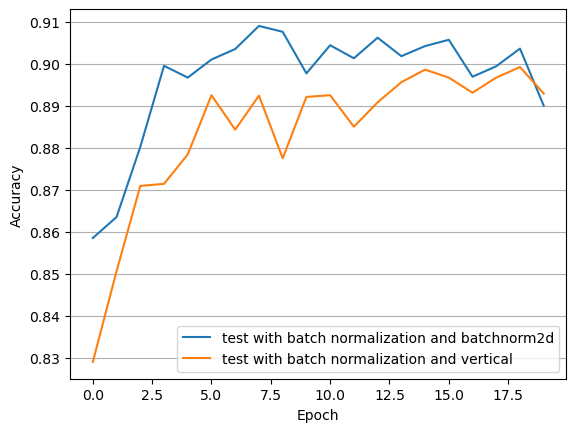

In [28]:
# plt.plot(test_acc_8_SGD_05, label = 'learning rate 0.5')
# plt.plot(test_acc_transform_batch_batchnorm2d, label = 'learning rate 0.1')
# plt.plot(test_acc_8_SGD_002, label = 'learning rate 0.02')

#plt.plot(test_acc_8_Adam_75e_4, label = 'learning rate 7.5e-3')
#plt.plot(test_acc_8_Adam_15e_4, label = 'learning rate 1.5e-3')
#plt.plot(test_acc_8_Adam_3e_4, label = 'learning rate 3e-4')
#plt.plot(test_acc_8_Adam_6e_5, label = 'learning rate 6e-5')

# plt.plot(train_acc_initial, label='train with no batch normalization')
# plt.plot(train_acc_transform_batch, label = 'train with batch normalization')
# plt.plot(test_acc_initial, label = 'test with no batch normalization')
# plt.plot(test_acc_transform_batch, label = 'test with batch normalization')
#plt.plot(train_acc_transform_batch_batchnorm2d, label = 'train with batch normalization and batchnorm2d')  # Baseline
plt.plot(test_acc_transform_batch_batchnorm2d, label = 'test with batch normalization and batchnorm2d')  # Baseline
# plt.plot(test_acc_horizontal, label = 'test with batch normalization and batchnorm2d and horizontal flip')
# plt.plot(test_acc_affine, label = 'test with batch normalization and affine')
plt.plot(test_acc_vertical, label = 'test with batch normalization and vertical')

# plt.plot(train_acc_transform_batch_batchnorm2d, label = 'train kernel 3')  # Baseline
# plt.plot(test_acc_transform_batch_batchnorm2d, label = 'test kernel 3')  # Baseline
# plt.plot(train_acc_kernel5, label = 'train kernel 5')
# plt.plot(test_acc_kernel5, label = 'test kernel 5')

# plt.plot(train_acc_transform_batch_batchnorm2d, label = 'Train Channel=8')  # Baseline
# plt.plot(test_acc_transform_batch_batchnorm2d, label = 'Test Channel=8')  # Baseline

# plt.plot(train_acc_16, label = 'Train Channel=16')
# plt.plot(test_acc_16, label = 'Test Channel=16')
# plt.plot(test_acc_32, label = 'Test Channel=32')
# plt.plot(test_acc_32_horizontal, label= 'Test Channel=32 and random horizontal')
# plt.plot(test_acc_64, label = 'Test Channel=64')
# plt.plot(test_acc_64_horizontal, label= 'Test Channel=64 and random horizontal')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.legend()
plt.show()

## Conclusion of three models

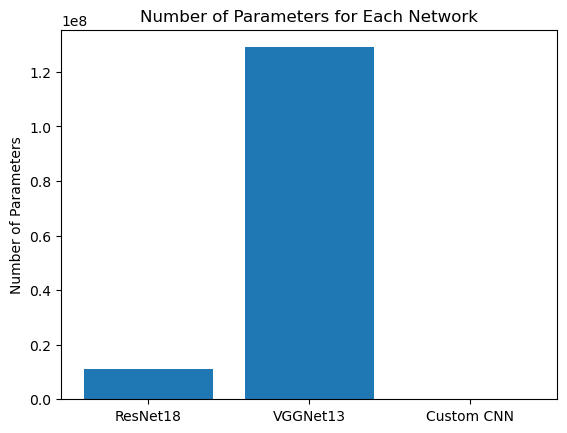

In [13]:
name = ['ResNet18', 'VGGNet13', 'Custom CNN']
parameters = [11175370, 128990602, 235734]
accuracy = [92.86, 92.43, 92.7]
plt.ylabel('Number of Parameters')
plt.title("Number of Parameters for Each Network")
plt.bar(name, parameters)
plt.show()

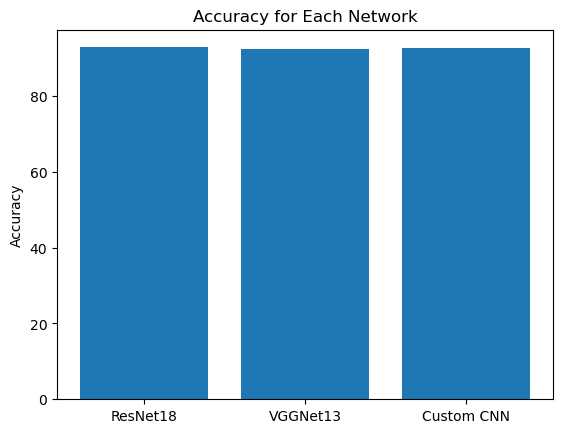

In [12]:
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Network')
plt.bar(name, accuracy)
plt.show()